**Importing libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay

**Importing data**

In [3]:
data = pd.read_csv('trainKNN.txt', sep=",", header=None)
test_data = pd.read_csv('testKNN.txt', sep=",", header=None)
data.columns = ["Id_number", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type_of_glass"]
test_data.columns = ["Id_number", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type_of_glass"]

In [4]:
data.head()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
test_data.head()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
2,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
3,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
4,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id_number      196 non-null    int64  
 1   RI             196 non-null    float64
 2   Na             196 non-null    float64
 3   Mg             196 non-null    float64
 4   Al             196 non-null    float64
 5   Si             196 non-null    float64
 6   K              196 non-null    float64
 7   Ca             196 non-null    float64
 8   Ba             196 non-null    float64
 9   Fe             196 non-null    float64
 10  Type_of_glass  196 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 17.0 KB


In [7]:
#Dropping ID_numbers since not useful
data1 = data.drop("Id_number", axis = 1)
test_data1 = data.drop("Id_number", axis = 1)

In [8]:
data1.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type_of_glass    0
dtype: int64

In [9]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,196.0,1.518295,0.003055,1.51131,1.516458,1.51763,1.518985,1.53393
Na,196.0,13.375204,0.783145,10.73000,12.877500,13.28000,13.792500,15.79000
Mg,196.0,2.758980,1.392641,0.00000,2.362500,3.48000,3.610000,4.49000
Al,196.0,1.454337,0.491688,0.29000,1.190000,1.36000,1.622500,3.50000
Si,196.0,72.635408,0.763578,69.81000,72.317500,72.81000,73.080000,75.18000
K,196.0,0.519388,0.672703,0.00000,0.140000,0.56000,0.610000,6.21000
Ca,196.0,8.910714,1.421490,5.43000,8.220000,8.57500,9.092500,16.19000
Ba,196.0,0.164235,0.485198,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,196.0,0.050255,0.086359,0.00000,0.000000,0.00000,0.090000,0.34000
Type_of_glass,196.0,2.668367,2.062416,1.00000,1.000000,2.00000,3.000000,7.00000


In [10]:
type_nos = data1.groupby('Type_of_glass')['Type_of_glass'].count()
print(type_nos)

Type_of_glass
1    67
2    73
3    14
5    10
6     6
7    26
Name: Type_of_glass, dtype: int64


C:\Users\aravi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


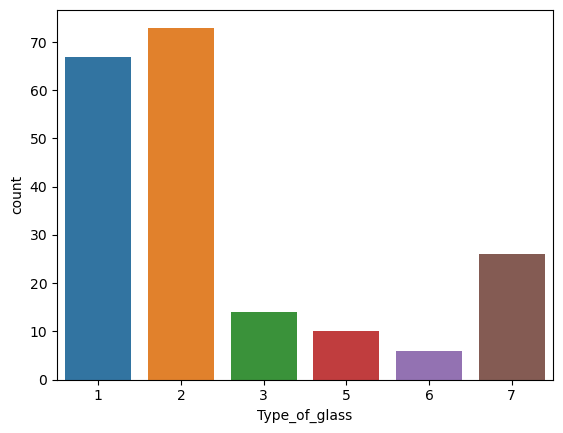

In [12]:
sns.countplot(data1['Type_of_glass'])
plt.show()

In [14]:
y_train = data1["Type_of_glass"]
x_train = data1.drop("Type_of_glass", axis = 1)

In [16]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_scaled = scaler.transform(x_train)

In [17]:
x_MinMax = pd.DataFrame(data = x_scaled, columns = ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"])

In [65]:
y_test = test_data1["Type_of_glass"]
x_test = test_data1.drop("Type_of_glass", axis = 1)

scaler = MinMaxScaler()
scaler.fit(x_test)
x_scaled = scaler.transform(x_test)

In [66]:
#KNN model - Manhattam Distance

model= KNeighborsClassifier(n_neighbors=3, p = 1)     #Manhattan distance
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3, p=1)

In [67]:
#predicting the output from the test values
y_pred_p1 = model.predict(x_test)
y_pred_p1

array([1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 1, 3, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3,
       7, 2, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 1, 2, 7, 6,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7],
      dtype=int64)

In [68]:
matrix_p1 = confusion_matrix(y_test,y_pred_p1)
matrix_p1

array([[62,  3,  2,  0,  0,  0],
       [ 5, 66,  1,  1,  0,  0],
       [ 8,  0,  6,  0,  0,  0],
       [ 0,  1,  0,  8,  0,  1],
       [ 0,  0,  0,  0,  6,  0],
       [ 2,  1,  0,  0,  1, 22]], dtype=int64)

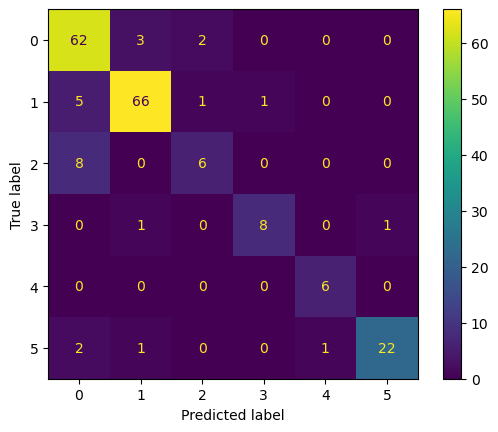

In [69]:
#displaying the confusion matrix
cm = ConfusionMatrixDisplay(matrix_p1)
cm.plot()
plt.show()

In [78]:
score_p1 = accuracy_score(y_test,y_pred_p1)

In [71]:
report= classification_report(y_test,y_pred_p1)
print(report)

              precision    recall  f1-score   support

           1       0.81      0.93      0.86        67
           2       0.93      0.90      0.92        73
           3       0.67      0.43      0.52        14
           5       0.89      0.80      0.84        10
           6       0.86      1.00      0.92         6
           7       0.96      0.85      0.90        26

    accuracy                           0.87       196
   macro avg       0.85      0.82      0.83       196
weighted avg       0.87      0.87      0.86       196



In [72]:
#KNN model - Euclidian Distance

model= KNeighborsClassifier(n_neighbors=3, p = 2)     #Manhattan distance
model.fit(x_train,y_train)

#predicting the output from the test values
y_pred_p2 = model.predict(x_test)
y_pred_p2

array([1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 1, 3, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3,
       7, 2, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 7, 2, 7, 7, 1, 2, 7, 6,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7],
      dtype=int64)

In [73]:
matrix_p2 = confusion_matrix(y_test,y_pred_p2)
matrix_p2

array([[62,  3,  2,  0,  0,  0],
       [10, 62,  0,  1,  0,  0],
       [ 8,  0,  6,  0,  0,  0],
       [ 0,  1,  0,  8,  0,  1],
       [ 0,  1,  0,  0,  4,  1],
       [ 2,  1,  0,  0,  1, 22]], dtype=int64)

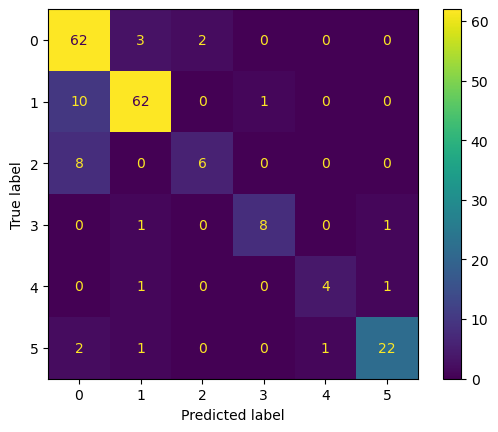

In [74]:
#displaying the confusion matrix
cm = ConfusionMatrixDisplay(matrix_p2)
cm.plot()
plt.show()

In [75]:
score_p2 = accuracy_score(y_test,y_pred_p2)

In [76]:
report= classification_report(y_test,y_pred_p2)
print(report)

              precision    recall  f1-score   support

           1       0.76      0.93      0.83        67
           2       0.91      0.85      0.88        73
           3       0.75      0.43      0.55        14
           5       0.89      0.80      0.84        10
           6       0.80      0.67      0.73         6
           7       0.92      0.85      0.88        26

    accuracy                           0.84       196
   macro avg       0.84      0.75      0.78       196
weighted avg       0.84      0.84      0.83       196



In [79]:
print('the accuracy of this model using manhattan distance is: ', score_p1)
print('the accuracy of this model using euclidian distance is: ',score_p2)

the accuracy of this model using manhattan distance is:  0.8673469387755102
the accuracy of this model using euclidian distance is:  0.8367346938775511
